<a href="https://colab.research.google.com/github/Mostafa772/ML_MIPT_HW/blob/final_project_first_semester/students_performance_eda_and_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/exams.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from IPython.display import Markdown, display

In [ ]:
def printm(x):
    display(Markdown(x))

In [ ]:
data = pd.read_csv('../input/students-performance-in-exams/exams.csv')
data = data.rename(columns={
    'race/ethnicity': 'race_ethnicity',
    'parental level of education': 'parent_education',
    'test preparation course': 'test_preparation_course',
    'math score': 'math_score',
    'reading score': 'reading_score',
    'writing score': 'writing_score',
})
data.head()

,gender,race_ethnicity,parent_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   gender                   1000 non-null   object
 1   race_ethnicity           1000 non-null   object
 2   parent_education         1000 non-null   object
 3   lunch                    1000 non-null   object
 4   test_preparation_course  1000 non-null   object
 5   math_score               1000 non-null   int64 
 6   reading_score            1000 non-null   int64 
 7   writing_score            1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
data.describe()

,math_score,reading_score,writing_score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


# Checking For Null Values

In [ ]:
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().sum()/82790)*100})
missing_data

,total_missing,perc_missing
gender,0,0.0
race_ethnicity,0,0.0
parent_education,0,0.0
lunch,0,0.0
test_preparation_course,0,0.0
math_score,0,0.0
reading_score,0,0.0
writing_score,0,0.0


## Creating an average column of the marks of the students

In [ ]:
data["avg_mark"] = (data['math_score'] +  data['reading_score'] + data['writing_score']) / 3 

Divinding data into categorical and numirical

In [ ]:
def GetGrade(Percentage):   
    if ( Percentage >= 80 ):
        return 'A'
    if ( Percentage >= 70):
        return 'B'
    if ( Percentage >= 60):
        return 'C'
    if ( Percentage >= 50):
        return 'D'
    if ( Percentage >= 35):
        return 'E'
    else: 
        return 'F'

data['grade'] = data.apply(lambda x : GetGrade(x['avg_mark']), axis=1)

data.grade.value_counts()

C    266
B    236
A    211
D    163
E    109
F     15
Name: grade, dtype: int64

In [ ]:
cat_cols = ['gender', 'race_ethnicity', 'parent_education', 'lunch', 'test_preparation_course', 'grade']
num_cols = ['math_score', 'reading_score', 'writing_score', 'avg_mark']

In [ ]:
data

,gender,race_ethnicity,parent_education,lunch,test_preparation_course,math_score,reading_score,writing_score,avg_mark,grade
0,male,group A,high school,standard,completed,67,67,63,65.666667,C
1,female,group D,some high school,free/reduced,none,40,59,55,51.333333,D
2,male,group E,some college,free/reduced,none,59,60,50,56.333333,D
3,male,group B,high school,standard,none,77,78,68,74.333333,B
4,male,group E,associate's degree,standard,completed,78,73,68,73.000000,B
...,...,...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65,69.333333,C
996,male,group D,associate's degree,free/reduced,completed,85,91,92,89.333333,A
997,female,group C,some high school,free/reduced,none,32,35,41,36.000000,E
998,female,group C,some college,standard,none,73,74,82,76.333333,B


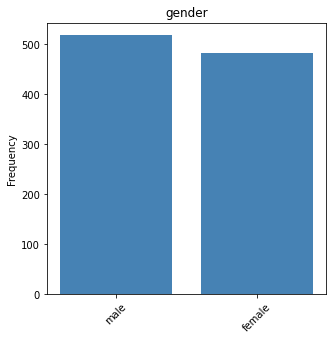

gender: 
male      517
female    483
Name: gender, dtype: int64


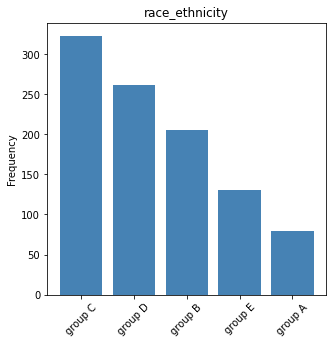

race_ethnicity: 
group C    323
group D    262
group B    205
group E    131
group A     79
Name: race_ethnicity, dtype: int64


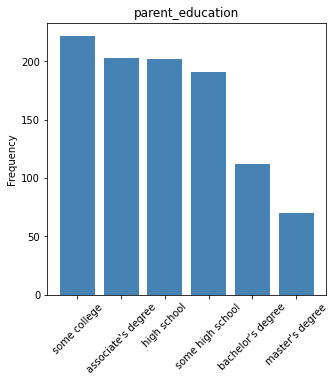

parent_education: 
some college          222
associate's degree    203
high school           202
some high school      191
bachelor's degree     112
master's degree        70
Name: parent_education, dtype: int64


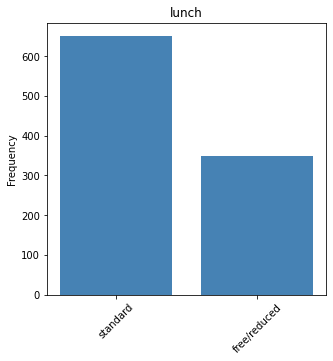

lunch: 
standard        652
free/reduced    348
Name: lunch, dtype: int64


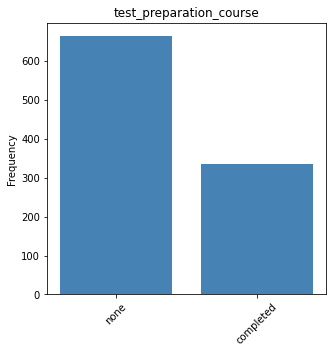

test_preparation_course: 
none         665
completed    335
Name: test_preparation_course, dtype: int64


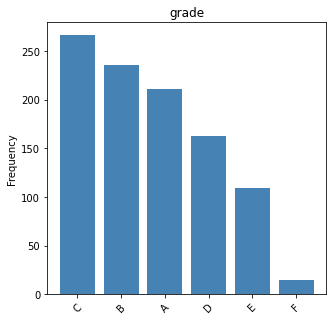

grade: 
C    266
B    236
A    211
D    163
E    109
F     15
Name: grade, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

for variable in cat_cols:
    var = data[variable]    
    varValue = var.value_counts()
    
    plt.figure(figsize =(5,5))
    plt.bar(varValue.index, varValue, color='#4682b4')
    plt.xticks(varValue.index, varValue.index.values,rotation=45)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n{}".format(variable,varValue))

## How to read a box plot:
> The left most is the minimum values.
The left end of the box indicates the end of the first quartile Q1.
The median is the line in the center of the box.
The right end of the box indicates the end of the first the third quartile Q3.
The right most is the maximum values.

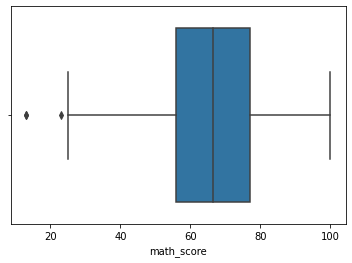

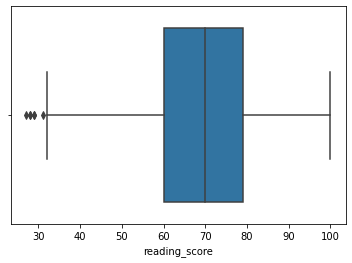

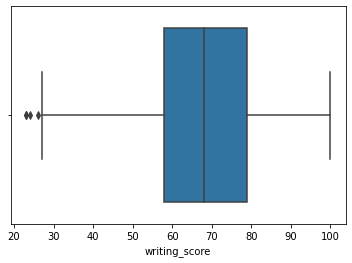

In [ ]:
for col in num_cols[:-1]:
    sns.boxplot(x=data[col])
    plt.show()

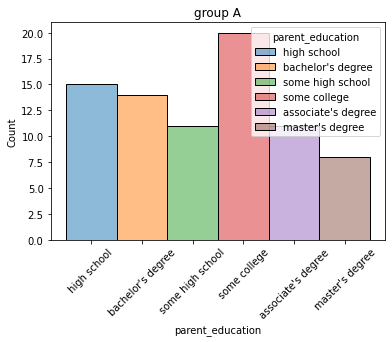

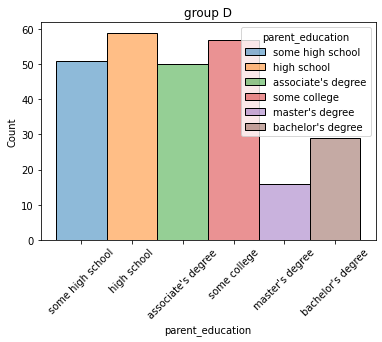

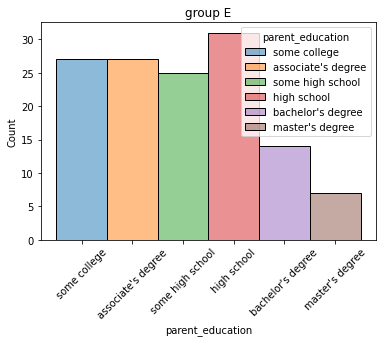

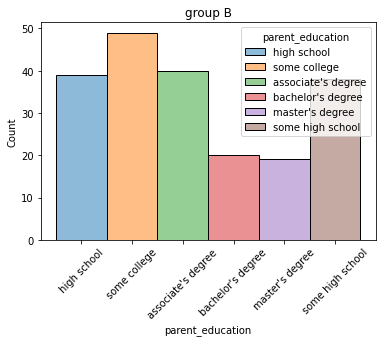

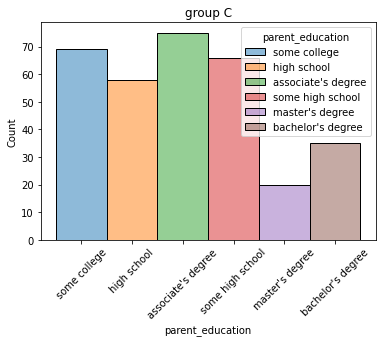

In [ ]:
data_groupedby_ethnicity = data.groupby("race_ethnicity")
# for x in data['race/ethnicity'].unique():
data_groupedby_ethnicity.get_group('group A')
for x in data['race_ethnicity'].unique():
    ax = sns.histplot(data=data_groupedby_ethnicity.get_group(x), x="parent_education", hue="parent_education")
    ax.tick_params(axis='x', rotation=45) 
    ax.set_title(x)
    plt.show(ax)
data_groupedby_ethnicity

We can notice that groups B, C and D parents had the best education.

In [ ]:
# data_groupedby_ethnicity.get_group(x)["avg_mark"]
avg_mark_race_ethnicity = []
for x in data['race_ethnicity'].unique():
    avg_mark_race_ethnicity.append(int(np.mean(data_groupedby_ethnicity.get_group(x)["avg_mark"])))
print(avg_mark_race_ethnicity)

[66, 71, 72, 65, 64]


Here we are comparing the average score based on the ethnicity

<AxesSubplot:xlabel='1', ylabel='0'>

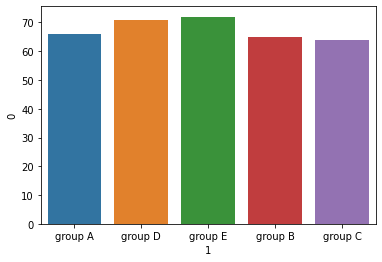

In [ ]:
marks_ethnicity_df = pd.DataFrame(avg_mark_race_ethnicity)
marks_ethnicity_df[1] = data['race_ethnicity'].unique()
marks_ethnicity_df
sns.barplot(data=marks_ethnicity_df, x=1,y=0)

In [ ]:
def compare_groups(grouping_variable):
    printm(f'We are looking at the effect of **{grouping_variable.upper()}**.')
    printm('\n\n')
    t = data
    t.groupby(grouping_variable).mean().T.plot(kind='bar', figsize=(10,4)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
    plt.grid()
    plt.title(grouping_variable.upper())
    plt.show()
    pairs = [pair for pair in t.groupby(grouping_variable)]
#     print(pairs)
    values, groups = [pair[0] for pair in pairs], [pair[1] for pair in pairs]
#     print(values, groups)
    for course in num_cols:
        scores = [subdf[course] for subdf in groups]
        averages = [subdf[course].mean().round(2) for subdf in groups]
        printm(f'**COURSE:** {course.split()[0].upper()}')
        
        for val,avg in zip(values, averages):
            printm(f'Average for **{val}** is {avg}.')
            
        f_value, p_value = f_oneway(*scores)
        if p_value < .05:
            printm(f'There is a significant effect of _{grouping_variable}_.')
        else:
            printm('There is no significant difference between groups.')
        printm('---')

Exploring the effect of test preparation course 

We are looking at the effect of **LUNCH**.

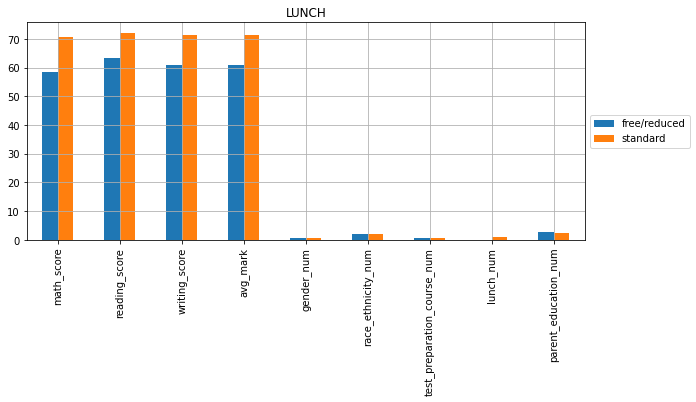

**COURSE:** MATH_SCORE

Average for **free/reduced** is 58.51.

Average for **standard** is 70.61.

There is a significant effect of _lunch_.

---

**COURSE:** READING_SCORE

Average for **free/reduced** is 63.19.

Average for **standard** is 72.1.

There is a significant effect of _lunch_.

---

**COURSE:** WRITING_SCORE

Average for **free/reduced** is 60.93.

Average for **standard** is 71.37.

There is a significant effect of _lunch_.

---

**COURSE:** AVG_MARK

Average for **free/reduced** is 60.87.

Average for **standard** is 71.36.

There is a significant effect of _lunch_.

---

In [ ]:
# data['test preparation course']
# data['test preparation course'] = data['test preparation course'].map({'completed':'Completed', 'none':'Not completed'})
# data
compare_groups('lunch')

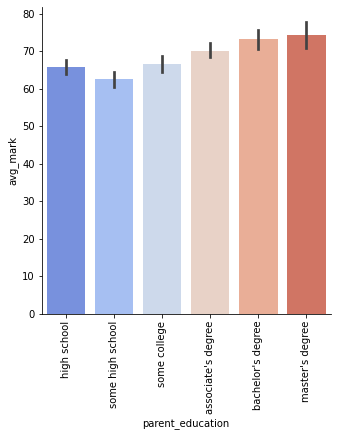

In [ ]:
sns.catplot(x="parent_education",y="avg_mark",data=data, palette="coolwarm",kind="bar")
plt.xticks(rotation=90)
plt.show()

Encoding Categorical Data

In [ ]:
from sklearn import preprocessing
lb=preprocessing.LabelEncoder()

data["gender_num"]=lb.fit_transform(data["gender"])
data["race_ethnicity_num"]=lb.fit_transform(data["race_ethnicity"])
data["test_preparation_course_num"]=lb.fit_transform(data["test_preparation_course"])
data["lunch_num"]=lb.fit_transform(data["lunch"])
data["parent_education_num"]=lb.fit_transform(data["parent_education"])


data_model=data.drop(["gender","race_ethnicity","test_preparation_course","lunch","parent_education"],axis=1)
# data_model=data_model.drop(["writing_score", "reading_score", "math_score", "avg_mark"], axis=1) # IF we use the models with these params we will get almost 100% accuracy
data_model.head()

,math_score,reading_score,writing_score,avg_mark,grade,gender_num,race_ethnicity_num,test_preparation_course_num,lunch_num,parent_education_num
0,67,67,63,65.666667,C,1,0,0,1,2
1,40,59,55,51.333333,D,0,3,1,0,5
2,59,60,50,56.333333,D,1,4,1,0,4
3,77,78,68,74.333333,B,1,1,1,1,2
4,78,73,68,73.000000,B,1,4,0,1,0


In [ ]:
y = data_model['grade']
X = data_model.drop(['grade'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 50)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
# print(x_train)

(750, 9)
(750,)
(250, 9)
(250,)


In [ ]:
# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# creating a scaler
mm = MinMaxScaler()

# feeding the independent variable into the scaler
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.fixes import loguniform
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report, plot_roc_curve
from sklearn.model_selection import GridSearchCV
import numpy as np
import scikitplot
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

In [ ]:
model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

param_grid = {'C': np.logspace(-4, 4, 20), 'l1_ratio': np.linspace(0, 1, 11),
              'penalty' :['elasticnet']}

search = GridSearchCV(model, param_grid, cv=5).fit(x_train, y_train)

The best parameters are {'C': 206.913808111479, 'l1_ratio': 1.0, 'penalty': 'elasticnet'}
F1 score of this model:  0.915870045549329
Accuracy score of this model:  0.972


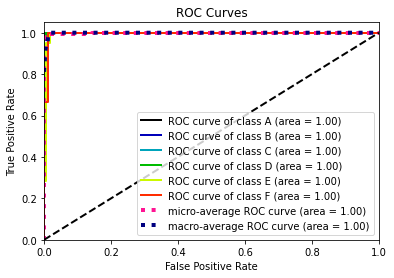

In [ ]:
print(f"The best parameters are {search.best_params_}")
y_predicted = search.predict(x_test)
print("F1 score of this model: ", f1_score(y_test, y_predicted, average='macro'))
print("Accuracy score of this model: ", search.score(x_test, y_test))
    
# Plot the ROC-curve
predicted_proba = search.predict_proba(x_test)
scikitplot.metrics.plot_roc(y_test, predicted_proba)
plt.show()

{'criterion': 'gini', 'max_depth': None, 'max_features': None, 'splitter': 'best'}
F1 score :  0.915870045549329
Accuracy score :  1.0


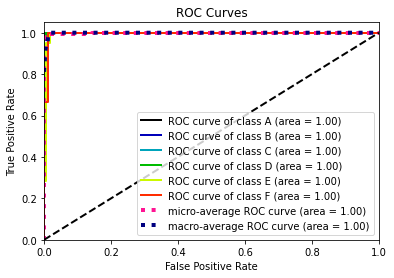

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

predictions = clf.predict(x_train)
# print(accuracy_score(y_test, predictions))

params = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10, 12, 14, 18, 22],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'splitter': ['best', 'random']
}

gs_cv = GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs=-1
)

gs_cv.fit(x_train, y_train)
print(gs_cv.best_params_)

print("F1 score : ", f1_score(y_test, y_predicted, average='macro'))
print("Accuracy score : ", gs_cv.score(x_test, y_test))

# Plot the ROC-curve
predicted_proba = search.predict_proba(x_test)
scikitplot.metrics.plot_roc(y_test, predicted_proba)
plt.show()